In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [4]:
ds=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\Elon_musk.csv",encoding='Latin-1')
ds.drop(["Unnamed: 0"],inplace=True,axis=1)
ds

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
ds=[Text.strip() for Text in ds.Text]
ds=[Text for Text in ds if Text]
ds[0:12]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest']

In [6]:
punc ='''!()-[]{};:'"\,<>./?@#$%^&*_~''';
for i in ds:
    if i in punc:
        ds = punc.replace(i," ")
        ds

In [7]:
ds

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [11]:
ds= str(ds)
ds=ds.replace("@",'')
ds =ds.replace("tobylpppppppp","")

In [12]:
ds

'[\'kunalb11 I\\x92m an alien\', \'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\', \'joerogan Spotify Great interview!\', \'gtera27 Doge is underestimated\', \'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\', \'Happy New Year of the Ox! https://t.co/9WFKMYu2oj\', \'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all. https://t.co/zGxJFDzzrM\', \'OwenSparks_ flcnhvy anonyx10 Haha thanks :)\', \'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\', \'The most entertaining outcome is the most likely\', \'GiveDirectly Just sent some\', \'Just agree to do Clubhouse with kanyewest\', \'https://t.co/3rWE9uHSTS\', \'geoffkeighley UnrealEngine It\\x92s getting real\', \'Bought some Dogecoin for lil X, so he can be a toddler hodler\', \'JoshManMode He definitely has issues, but the sentencing seems a bit high\', \'freewalletorg Thanks for fix

In [13]:
import re
no_url_txt=re.sub(r"http\S+",'',punc)
no_url_txt

'!()-[]{};:\'"\\,<>./?@#$%^&*_~'

In [14]:
ds =re.sub('<[^>]+>', ' ', ds)
ds

'[\'kunalb11 I\\x92m an alien\', \'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\', \'joerogan Spotify Great interview!\', \'gtera27 Doge is underestimated\', \'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\', \'Happy New Year of the Ox! https://t.co/9WFKMYu2oj\', \'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all. https://t.co/zGxJFDzzrM\', \'OwenSparks_ flcnhvy anonyx10 Haha thanks :)\', \'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\', \'The most entertaining outcome is the most likely\', \'GiveDirectly Just sent some\', \'Just agree to do Clubhouse with kanyewest\', \'https://t.co/3rWE9uHSTS\', \'geoffkeighley UnrealEngine It\\x92s getting real\', \'Bought some Dogecoin for lil X, so he can be a toddler hodler\', \'JoshManMode He definitely has issues, but the sentencing seems a bit high\', \'freewalletorg Thanks for fix

In [15]:
ds[0:7000]

"['kunalb11 I\\x92m an alien', 'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?', 'joerogan Spotify Great interview!', 'gtera27 Doge is underestimated', 'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!', 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj', 'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all. https://t.co/zGxJFDzzrM', 'OwenSparks_ flcnhvy anonyx10 Haha thanks :)', 'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.', 'The most entertaining outcome is the most likely', 'GiveDirectly Just sent some', 'Just agree to do Clubhouse with kanyewest', 'https://t.co/3rWE9uHSTS', 'geoffkeighley UnrealEngine It\\x92s getting real', 'Bought some Dogecoin for lil X, so he can be a toddler hodler', 'JoshManMode He definitely has issues, but the sentencing seems a bit high', 'freewalletorg Thanks for fixing', 'freewalletorg Please unloc

In [16]:
from nltk import tokenize
tweet_sentances =tokenize.sent_tokenize(ds)
tweet_sentances

["['kunalb11 I\\x92m an alien', 'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.",
 'Have you tried it?',
 "', 'joerogan Spotify Great interview!",
 "', 'gtera27 Doge is underestimated', 'teslacn Congratulations Tesla China for amazing execution last year.",
 'Now on to the next for even more!!',
 "', 'Happy New Year of the Ox!",
 "https://t.co/9WFKMYu2oj', 'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all.",
 "https://t.co/zGxJFDzzrM', 'OwenSparks_ flcnhvy anonyx10 Haha thanks :)', 'flcnhvy anonyx10 Indeed!",
 'Tweets definitely do not represent real-world time allocation.',
 "', 'The most entertaining outcome is the most likely', 'GiveDirectly Just sent some', 'Just agree to do Clubhouse with kanyewest', 'https://t.co/3rWE9uHSTS', 'geoffkeighley UnrealEngine It\\x92s getting real', 'Bought some Dogecoin for lil X, so he can be a toddler hodler', 'JoshManMode He definitely has issues, but the sentencing seems a bit high', 'freewalletorg Thanks

In [17]:
sent_df =pd.DataFrame(tweet_sentances,columns =["sentance"])

In [18]:
sent_df

,sentance
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra..."
1,Have you tried it?
2,"', 'joerogan Spotify Great interview!"
3,"', 'gtera27 Doge is underestimated', 'teslacn ..."
4,Now on to the next for even more!!
...,...
897,"', 'kenyanwalstreet Not actually a payout, jus..."
898,"It may never pay out, as the stock can\x92t b\..."
899,Details Aug 28.
900,"', 'AI symbiosis while u wait', 'vistacruiser7..."


In [19]:
pw = pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\positive-words.csv")
pw

,Unnamed: 0,Unnamed: 1,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2009,youthful,NaN,NaN
2010,zeal,NaN,NaN
2011,zenith,NaN,NaN
2012,zest,NaN,NaN


In [20]:
pw_scores  = pw.set_index('Unnamed: 0')['Unnamed: 1'].to_dict()
pw_scores

{nan: nan,
 'a+': nan,
 'abound': nan,
 'abounds': nan,
 'abundance': nan,
 'abundant': nan,
 'accessable': nan,
 'accessible': nan,
 'acclaim': nan,
 'acclaimed': nan,
 'acclamation': nan,
 'accolade': nan,
 'accolades': nan,
 'accommodative': nan,
 'accomodative': nan,
 'accomplish': nan,
 'accomplished': nan,
 'accomplishment': nan,
 'accomplishments': nan,
 'accurate': nan,
 'accurately': nan,
 'achievable': nan,
 'achievement': nan,
 'achievements': nan,
 'achievible': nan,
 'acumen': nan,
 'adaptable': nan,
 'adaptive': nan,
 'adequate': nan,
 'adjustable': nan,
 'admirable': nan,
 'admirably': nan,
 'admiration': nan,
 'admire': nan,
 'admirer': nan,
 'admiring': nan,
 'admiringly': nan,
 'adorable': nan,
 'adore': nan,
 'adored': nan,
 'adorer': nan,
 'adoring': nan,
 'adoringly': nan,
 'adroit': nan,
 'adroitly': nan,
 'adulate': nan,
 'adulation': nan,
 'adulatory': nan,
 'advanced': nan,
 'advantage': nan,
 'advantageous': nan,
 'advantageously': nan,
 'advantages': nan,
 'a

In [22]:
import spacy
nlp =spacy.load('en_core_web_sm')
sentimennt_lexicon =pw_scores
def cal_sentiment(text:  str=None):
    sent_score =0;
    if text:
        sentance = nlp(text)
        for  i in sentance:
            sent_score = sent_score +sentimennt_lexicon.get(i.lemma_, 4)
    return sent_score
cal_sentiment(text="symbiosis ")

4

In [23]:
sent_df['Sentiment_value']=sent_df['sentance'].apply(cal_sentiment)
sent_df.head()

,sentance,Sentiment_value
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra...",88.0
1,Have you tried it?,20.0
2,"', 'joerogan Spotify Great interview!",NaN
3,"', 'gtera27 Doge is underestimated', 'teslacn ...",NaN
4,Now on to the next for even more!!,40.0


In [24]:
sent_df['word_count']=sent_df['sentance'].str.split(" ").apply(len)
sent_df.head()

,sentance,Sentiment_value,word_count
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra...",88.0,13
1,Have you tried it?,20.0,4
2,"', 'joerogan Spotify Great interview!",NaN,5
3,"', 'gtera27 Doge is underestimated', 'teslacn ...",NaN,14
4,Now on to the next for even more!!,40.0,8


In [25]:
sent_df.sort_values(by="Sentiment_value")

,sentance,Sentiment_value,word_count
103,Hopefully.,8.0,1
507,Ovaltine?,8.0,1
760,returned.,8.0,1
380,Bandwidth too.,12.0,2
100,I agree.,12.0,2
...,...,...,...
893,"', 'burakaydik True', 'Wow, IHOP &amp; GitHub ...",NaN,16
895,This is both great &amp; terrifying.,NaN,6
898,"It may never pay out, as the stock can\x92t b\...",NaN,31
900,"', 'AI symbiosis while u wait', 'vistacruiser7...",NaN,48


In [26]:
sent_df[sent_df['Sentiment_value']< 0].head()

,sentance,Sentiment_value,word_count


In [27]:
sent_df['Sentiment_value'].describe()

count    445.000000
mean      77.456180
std       76.119637
min        8.000000
25%       32.000000
50%       52.000000
75%      100.000000
max      744.000000
Name: Sentiment_value, dtype: float64

C:\Users\Vikas Salunke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

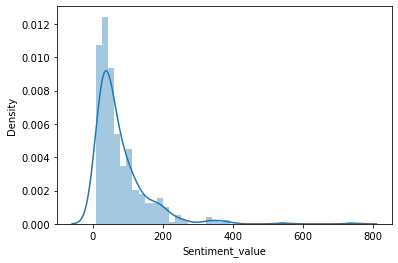

In [28]:
import seaborn as sns
sns.distplot(sent_df["Sentiment_value"])

C:\Users\Vikas Salunke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

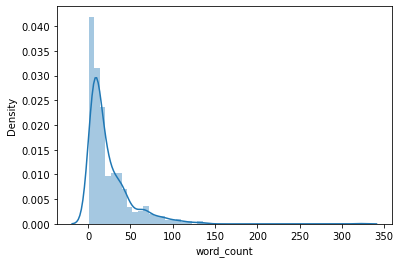

In [29]:
sns.distplot(sent_df["word_count"])

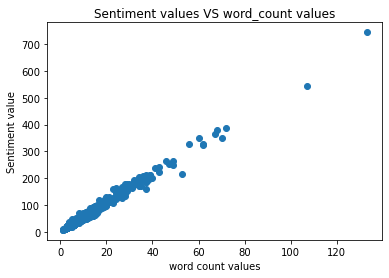

In [30]:
figsize=(10,10)
plt.xlabel("word count values")
plt.ylabel("Sentiment value")
plt.title("Sentiment values VS word_count values")
plt.scatter(y='Sentiment_value', x='word_count',data=sent_df)

<AxesSubplot:xlabel='word_count', ylabel='Sentiment_value'>

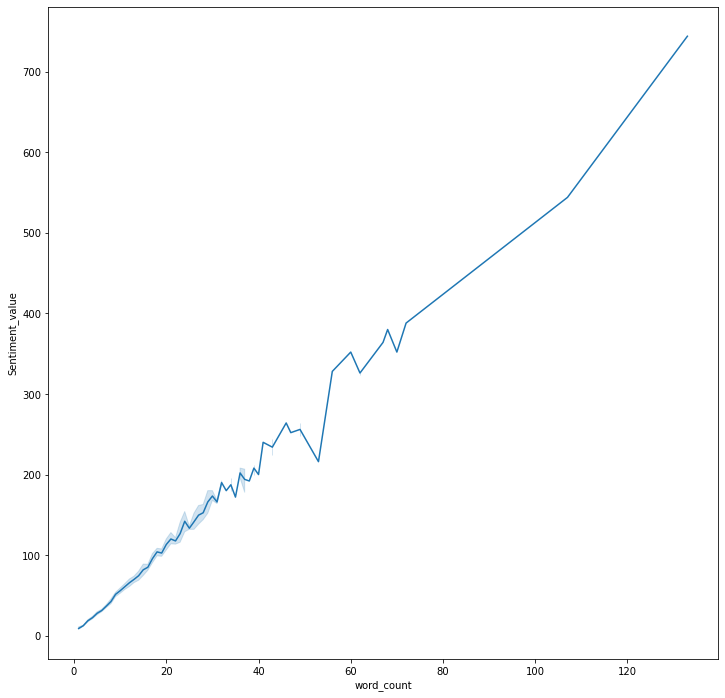

In [31]:
plt.figure(figsize=(12,12))
sns.lineplot(y='Sentiment_value', x='word_count',data=sent_df)